## Packages

In [28]:

from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

%matplotlib inline

from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

# from keras.models import Sequential
# from keras.layers import Dense

## Load the data

In [29]:
df = pd.read_csv("E-scooter_data_2020.csv", dtype=str)
# we can remove the rows that contains null values- because we have a lot of other data
# in addition, null value mean that the station wasn't in Chicago
df = df.dropna()

# Convert data to a suitable format date

In [30]:
# Convert the End Time column to datetime objects
df['End Time'] = pd.to_datetime(df['End Time'])
df['Start Time'] = pd.to_datetime(df['Start Time'])
# Extract the hour, minute, and second features from the datetime objects
df['End Hour'] = df['End Time'].dt.hour
df['start Hour'] = df['Start Time'].dt.hour
df["start_day"] = df["Start Time"].apply(lambda x : x.strftime('%A'))
# Remove the original End Time column
df.drop('End Time', axis=1, inplace=True)
df.drop('Start Time', axis=1, inplace=True)

In [31]:
df

,Trip ID,Trip Distance,Trip Duration,Vendor,Start Community Area Number,End Community Area Number,Start Community Area Name,End Community Area Name,Start Centroid Latitude,Start Centroid Longitude,Start Centroid Location,End Centroid Latitude,End Centroid Longitude,End Centroid Location,End Hour,start Hour,start_day
0,3eb9a2a3-3266-4559-b1ec-e83a6f7972ab,1153,1027,spin,68,68,ENGLEWOOD,ENGLEWOOD,41.78006847,-87.64226608,POINT (-87.64226608 41.78006847),41.78006847,-87.64226608,POINT (-87.64226608 41.78006847),5,5,Wednesday
1,82dd7b8f-8de0-4f25-829b-b32bf47e8419,17,91,spin,22,21,LOGAN SQUARE,AVONDALE,41.92290349,-87.70430082,POINT (-87.70430082 41.92290349),41.93928256,-87.71075685,POINT (-87.71075685 41.93928256),5,5,Wednesday
2,9120cbf3-f749-49b6-b894-0e6e065cd731,2883,724,spin,3,6,UPTOWN,LAKE VIEW,41.96543532,-87.65514456,POINT (-87.65514456 41.96543532),41.9435138,-87.65749768,POINT (-87.65749768 41.9435138),5,5,Wednesday
3,cf2e4abc-2649-49be-924b-468a1aefc4c8,5,21,spin,31,31,LOWER WEST SIDE,LOWER WEST SIDE,41.84833501,-87.67517932,POINT (-87.67517932 41.84833501),41.84833501,-87.67517932,POINT (-87.67517932 41.84833501),5,5,Wednesday
4,0448afb5-ab64-4090-b528-e3050e7eb0f2,1179,245,spin,6,6,LAKE VIEW,LAKE VIEW,41.9435138,-87.65749768,POINT (-87.65749768 41.9435138),41.9435138,-87.65749768,POINT (-87.65749768 41.9435138),7,7,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630811,2c648499-436a-4244-bf2b-ce0041ee4129,4226,1327,lime,11,11,JEFFERSON PARK,JEFFERSON PARK,41.97872681,-87.76814656,POINT (-87.76814656 41.97872681),41.97872681,-87.76814656,POINT (-87.76814656 41.97872681),22,21,Saturday
630812,72119cd3-18db-4a08-8da7-1639a6894a18,1822,211,spin,3,3,UPTOWN,UPTOWN,41.96543532,-87.65514456,POINT (-87.65514456 41.96543532),41.96543532,-87.65514456,POINT (-87.65514456 41.96543532),21,21,Saturday
630813,1e01298b-75e3-4a22-b440-388b093f7202,878,325,lime,28,24,NEAR WEST SIDE,WEST TOWN,41.87425419,-87.66461906,POINT (-87.66461906 41.87425419),41.90145875,-87.67556756,POINT (-87.67556756 41.90145875),22,21,Saturday
630814,cce935b2-3dc8-4e06-b913-a1fd37c652d0,294,1332,bird,7,7,LINCOLN PARK,LINCOLN PARK,41.92188043,-87.64564651,POINT (-87.64564651 41.92188043),41.92188043,-87.64564651,POINT (-87.64564651 41.92188043),22,21,Saturday


# Predict vendor with start area

In [32]:
x_start_area=df[['Start Community Area Name']]
Y_vendor=df[['Vendor']]
X_train_sa, X_test_sa, y_train_vendor, y_test_vendor = train_test_split(x_start_area, Y_vendor, test_size=0.2, random_state=42)

In [33]:
x_encoder = OneHotEncoder()
y_encoder = LabelEncoder()
X_train_encoded_sa = x_encoder.fit_transform(X_train_sa).toarray()
X_test_encoded_sa = x_encoder.transform(X_test_sa).toarray()
y_train_encoded_vendor = y_encoder.fit_transform(y_train_vendor.values.ravel())
y_test_encoded_vendor = y_encoder.transform(y_test_vendor.values.ravel())

In [34]:
# Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_encoded_sa, y_train_encoded_vendor)
rf_predictions_vendor = rf_model.predict(X_test_encoded_sa)
# Inverse transform the predicted labels
rf_pred_labels_vendor = y_encoder.inverse_transform(rf_predictions_vendor)
accuracy_rf_vendor = accuracy_score(y_test_vendor, rf_pred_labels_vendor)

In [35]:
# Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_encoded_sa, y_train_encoded_vendor)
dt_predictions_vendor = dt_model.predict(X_test_encoded_sa)
# Inverse transform the predicted labels
dt_pred_labels_vendor = y_encoder.inverse_transform(dt_predictions_vendor)
dt_accuracy_vendor = accuracy_score(y_test_vendor, dt_pred_labels_vendor)

In [36]:
print("Accuracy RF:", accuracy_rf_vendor)
print("Decision Tree Accuracy:", dt_accuracy_vendor)

Accuracy RF: 0.4913895180196289
Decision Tree Accuracy: 0.4913895180196289


# Predict End Area

In [37]:
x_start_area_day=df[['Start Community Area Name', "start_day"]]
Y_end_area=df[['End Community Area Name']]
X_train_sad, X_test_sad, y_train_end, y_test_end = train_test_split(x_start_area_day, Y_end_area, test_size=0.2, random_state=42)

In [38]:
X_train_encoded_sad = x_encoder.fit_transform(X_train_sad).toarray()
X_test_encoded_sad = x_encoder.transform(X_test_sad).toarray()
y_train_encoded_end = y_encoder.fit_transform(y_train_end.values.ravel())
y_test_encoded_end = y_encoder.transform(y_test_end.values.ravel())

In [39]:
# Random Forest model
rf_model.fit(X_train_encoded_sad, y_train_encoded_end)
rf_predictions_end = rf_model.predict(X_test_encoded_sad)
# Inverse transform the predicted labels
rf_pred_labels_end = y_encoder.inverse_transform(rf_predictions_end)
accuracy_rf_end = accuracy_score(y_test_end, rf_pred_labels_end)

In [40]:
# Decision Tree model
dt_model.fit(X_train_encoded_sad, y_train_encoded_end)
dt_predictions_end = dt_model.predict(X_test_encoded_sad)
# Inverse transform the predicted labels
dt_pred_labels_end = y_encoder.inverse_transform(dt_predictions_end)
dt_accuracy_end = accuracy_score(y_test_end, dt_pred_labels_end)

In [41]:
print("Accuracy RF:", accuracy_rf_end)
print("Decision Tree Accuracy:", dt_accuracy_end)

Accuracy RF: 0.7005205229069814
Decision Tree Accuracy: 0.700472841419319


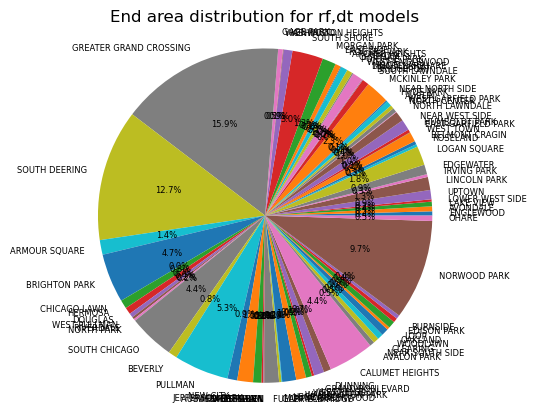

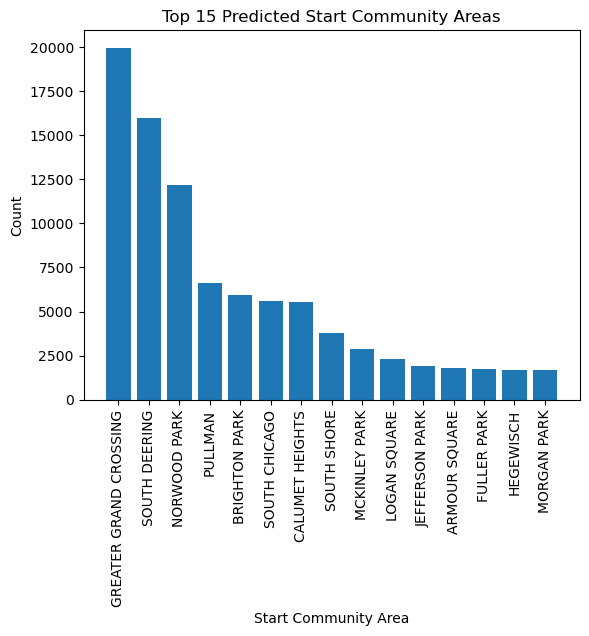

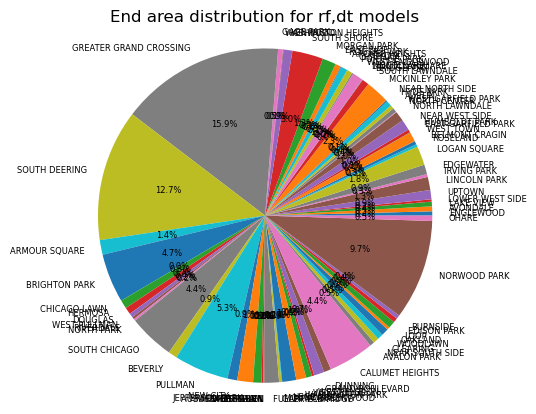

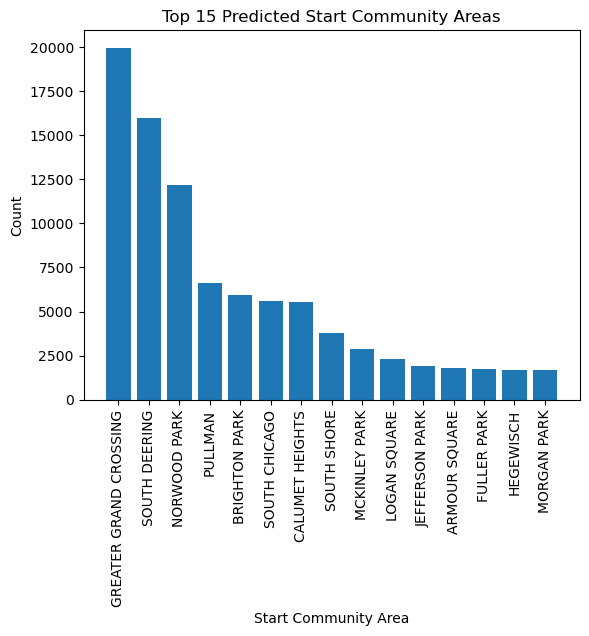

In [62]:
y_pred_list = [rf_predictions_end, dt_predictions_end]

for y_pred in y_pred_list: 

    labels = df['End Community Area Name'].unique()

    label_counts = {label: sum(y_pred == idx) for idx, label in enumerate(labels)}

    counts = list(label_counts.values())

    plt.pie(counts, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 6})
    plt.title("End area distribution for rf,dt models")
    plt.axis('equal')  
    plt.show()

    top_label_counts = dict(sorted(label_counts.items(), key=lambda x: x[1], reverse=True)[:15])

    labels = list(top_label_counts.keys())
    counts = list(top_label_counts.values())

    plt.bar(labels, counts)
    plt.xlabel('End Community Area')
    plt.ylabel('Count')
    plt.title('Top 15 Predicted End Community Areas')
    plt.xticks(rotation=90)
    plt.show()

## Predict End community area by Start community area and start hour

In [42]:
x =df[['Start Community Area Name', "start Hour"]]
Y =df[['End Community Area Name']]
X_train , X_test , y_train , y_test  = train_test_split(x , Y , test_size=0.2, random_state=42)

In [43]:
x_encoder = OneHotEncoder()
y_encoder = LabelEncoder()
X_train = x_encoder.fit_transform(X_train).toarray()
X_test = x_encoder.transform(X_test).toarray()
y_train = y_encoder.fit_transform(y_train.values.ravel())
y_test = y_encoder.transform(y_test.values.ravel())

In [63]:
# XGBoost model
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Parameters for XGB
# oost model
params = {
    'objective': 'multi:softmax',  
    'num_class': len(df['End Community Area Name'].unique()),  
    'max_depth': 3,  
    'eta': 0.1,  
    'seed': 42  
}


num_rounds = 100  
model = xgb.train(params, dtrain, num_rounds)

y_pred_boost = model.predict(dtest)



In [64]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 220.05670918265983


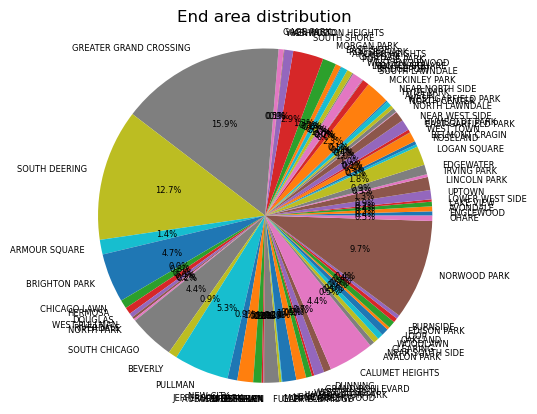

In [65]:
# Filter the areas

labels = df['End Community Area Name'].unique()

label_counts = {label: sum(y_pred_boost == idx) for idx, label in enumerate(labels)}

counts = list(label_counts.values())

plt.pie(counts, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 6})
plt.title('End area distribution')
plt.axis('equal')  
plt.show()

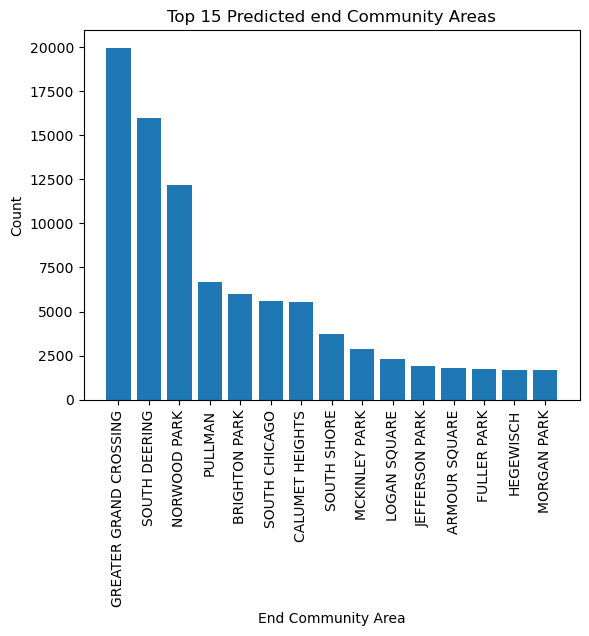

In [66]:

# Sort the label counts in descending order and select the top 15
top_label_counts = dict(sorted(label_counts.items(), key=lambda x: x[1], reverse=True)[:15])

labels = list(top_label_counts.keys())
counts = list(top_label_counts.values())

plt.bar(labels, counts)
plt.xlabel('End Community Area')
plt.ylabel('Count')
plt.title('Top 15 Predicted end Community Areas')
plt.xticks(rotation=90)
plt.show()

In [67]:
#KNN regressor model
knn = KNeighborsRegressor(n_neighbors=5)  
knn.fit(X_train, y_train)


y_pred_knn = knn.predict(X_test)

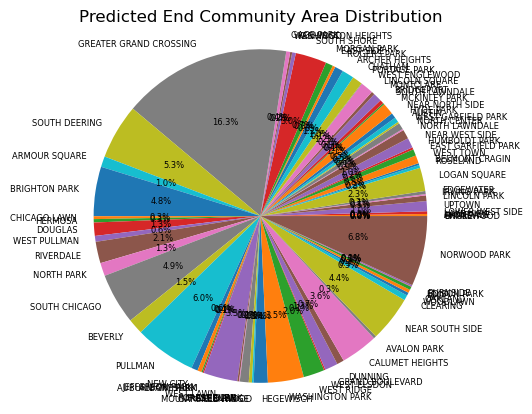

In [68]:
# Filter the areas

labels = df['End Community Area Name'].unique()

label_counts = {label: sum(y_pred_knn == idx) for idx, label in enumerate(labels)}

counts = list(label_counts.values())

plt.pie(counts, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 6})
plt.title('Predicted End Community Area Distribution')
plt.axis('equal')  
plt.show()

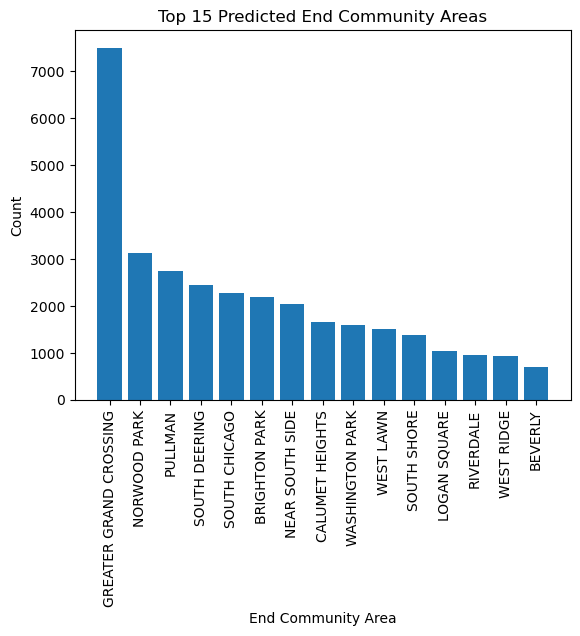

In [69]:
top_label_counts = dict(sorted(label_counts.items(), key=lambda x: x[1], reverse=True)[:15])

labels = list(top_label_counts.keys())
counts = list(top_label_counts.values())

plt.bar(labels, counts)
plt.xlabel('End Community Area')
plt.ylabel('Count')
plt.title('Top 15 Predicted End Community Areas')
plt.xticks(rotation=90)
plt.show()

In [49]:
mse = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error:", mse)

Mean Squared Error: 212.85178273135458
